# DESI DR1 BHBs

https://data.desi.lbl.gov/doc/releases/dr1/vac/mws-bhb/

Do a very simple reprocessing of the data into internal formats

In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
import astropy.units as u


In [2]:
# Open a FITS file
#hdul = fits.open('../data/observations/DESI_DR1/MWS_BHB.fits')
hdul = fits.open("https://data.desi.lbl.gov/public/dr1/vac/dr1/mws-bhb/v1.0/MWS_BHB.fits",use_fsspec=True)
# Print the structure of the FITS file
hdul.info()

Filename: <class 'fsspec.implementations.http.HTTPFile'>
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  RVTAB         1 BinTableHDU     92   6327R x 37C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 2A, D, D, K, E, E, E, L, D, 6A, K, 7A, 6A, L]   
  2  FIBERMAP      1 BinTableHDU    224   6327R x 85C   [K, J, D, D, E, E, E, K, B, 3A, D, J, I, 8A, J, J, 4A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, K, 2A, E, E, E, E, 1A, K, K, K, K, K, K, D, D, I, E, I, I, E, E, E, E, D, E, D, E, E, K, K, K, K, K, K, K, K, K, K, K, K, K, E, E, E, D, D]   
  3  GAIA          1 BinTableHDU    324   6327R x 153C   [K, 28A, K, K, D, D, E, D, E, D, E, E, E, D, E, D, E, E, E, E, E, E, E, E, E, E, E, I, I, I, I, E, E, E, E, I, L, E, E, E, E, E, E, E, E, I, I, E, I, I, I, E, E, I, I, E, E, E, E, E, E, E, E, E, L, I, D, E, E, E, I, D, E, E, E, I, D, E, E, E, E, I, I, I, I, I, E, E, E, E, E, I,

In [3]:
hdul[1].columns;hdul[2].columns;hdul[3].columns

ColDefs(
    name = 'SOLUTION_ID'; format = 'K'
    name = 'DESIGNATION'; format = '28A'
    name = 'SOURCE_ID'; format = 'K'
    name = 'RANDOM_INDEX'; format = 'K'
    name = 'REF_EPOCH'; format = 'D'; unit = 'yr'
    name = 'RA'; format = 'D'; unit = 'deg'
    name = 'RA_ERROR'; format = 'E'
    name = 'DEC'; format = 'D'; unit = 'deg'
    name = 'DEC_ERROR'; format = 'E'
    name = 'PARALLAX'; format = 'D'; unit = 'mas'
    name = 'PARALLAX_ERROR'; format = 'E'
    name = 'PARALLAX_OVER_ERROR'; format = 'E'
    name = 'PM'; format = 'E'
    name = 'PMRA'; format = 'D'; unit = 'mas  yr^-1'
    name = 'PMRA_ERROR'; format = 'E'
    name = 'PMDEC'; format = 'D'; unit = 'mas  yr^-1'
    name = 'PMDEC_ERROR'; format = 'E'
    name = 'RA_DEC_CORR'; format = 'E'
    name = 'RA_PARALLAX_CORR'; format = 'E'
    name = 'RA_PMRA_CORR'; format = 'E'
    name = 'RA_PMDEC_CORR'; format = 'E'
    name = 'DEC_PARALLAX_CORR'; format = 'E'
    name = 'DEC_PMRA_CORR'; format = 'E'
    name = 'DEC_PMD

Text(0, 0.5, 'logg')

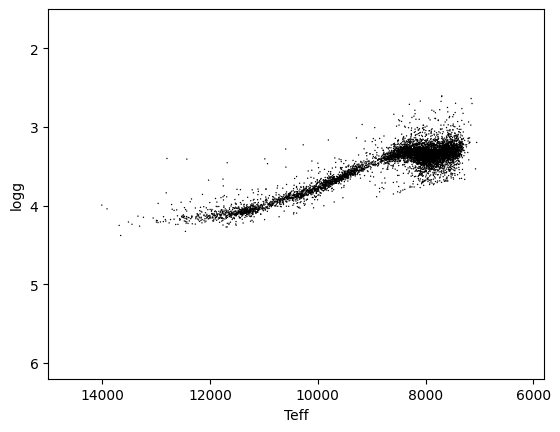

In [4]:
plt.scatter(hdul[1].data['TEFF'], hdul[1].data['LOGG'], edgecolor='none', facecolor='black', s=1)
#plt.scatter(hdul[1].data['TEFF'], hdul[1].data['FEH'], edgecolor='none', facecolor='black', s=1)

# should compare directly to SDSS as well
plt.axis([15000,5800,6.2,1.5])
plt.xlabel('Teff')
plt.ylabel('logg')

# looks good! like Figure 1 from Bystrom et al. (2025)

In [5]:

# g-r is then
#gr = hdul[2]['FLUX_G'] - hdul[2]['FLUX_R']
#plt.scatter(hdul[2].data['ABS_MAG_G'], hdul[2].data['DIST'], edgecolor='none', facecolor='black', s=1)

# this has some weird substructure in it
#plt.scatter(hdul[1].data['TEFF'], hdul[2].data['DIST'], edgecolor='none', facecolor='black', s=1)

In [6]:

# Extract the necessary data from the FITS file
ra = hdul[3].data['RA'] * u.deg  # Right Ascension
dec = hdul[3].data['DEC'] * u.deg  # Declination
distance = hdul[2].data['DIST'] * u.kpc  # Distance in kpc

# Extract proper motion and radial velocity data
pm_ra = hdul[3].data['PMRA'] * u.mas / u.yr  # Proper motion in RA
pm_dec = hdul[3].data['PMDEC'] * u.mas / u.yr  # Proper motion in DEC
radial_velocity = hdul[1].data['VRAD'] * u.km / u.s  # Radial velocity

# Update the SkyCoord object with velocity information
coords = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra, pm_dec=pm_dec, radial_velocity=radial_velocity, frame='icrs')

# Convert to Cartesian coordinates with velocity
cartesian_coords = coords.cartesian
cartesian_velocity = coords.velocity


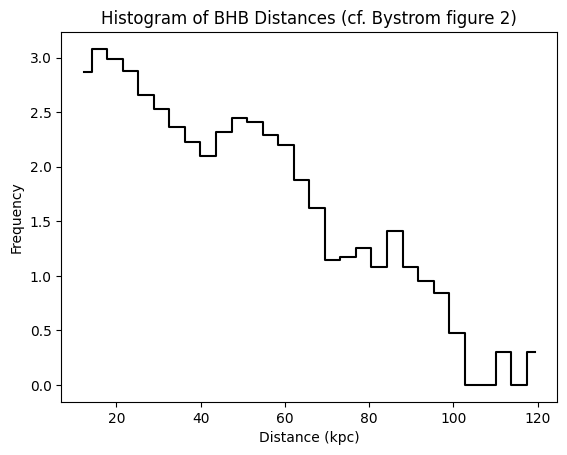

In [7]:
#plt.hist(distance.value, bins=50, color='blue', edgecolor='black')
# Calculate histogram values
hist_values, bin_edges = np.histogram(distance.value, bins=30)

# Plot the histogram manually
plt.plot(bin_edges[1:], np.log10(hist_values), color='black', drawstyle='steps-mid')
plt.xlabel('Distance (kpc)')
plt.ylabel('Frequency')
plt.title('Histogram of BHB Distances (cf. Bystrom figure 2)')
plt.show()



Text(0, 0.5, 'Ly (kpc km/s)')

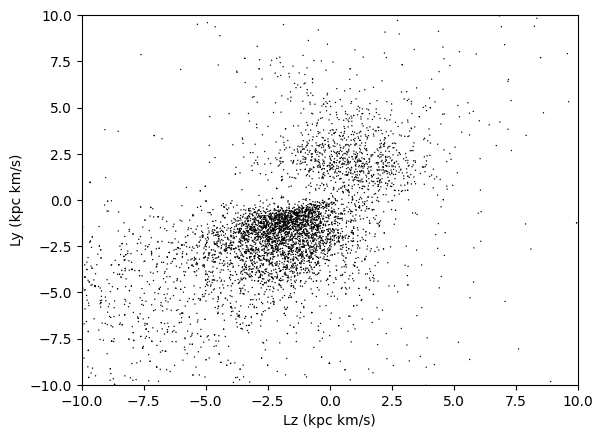

In [8]:
# compute the angular momenta
Lx = (cartesian_coords.y * cartesian_velocity.d_z - cartesian_coords.z * cartesian_velocity.d_y)
Ly = (cartesian_coords.z * cartesian_velocity.d_x - cartesian_coords.x * cartesian_velocity.d_z)
Lz = (cartesian_coords.x * cartesian_velocity.d_y - cartesian_coords.y * cartesian_velocity.d_x)

plt.scatter(Lz/1000,Ly/1000, edgecolor='none', facecolor='black', s=1)
plt.axis([-10,10,-10,10])
plt.xlabel('Lz (kpc km/s)')
plt.ylabel('Ly (kpc km/s)')

Text(0, 0.5, 'b')

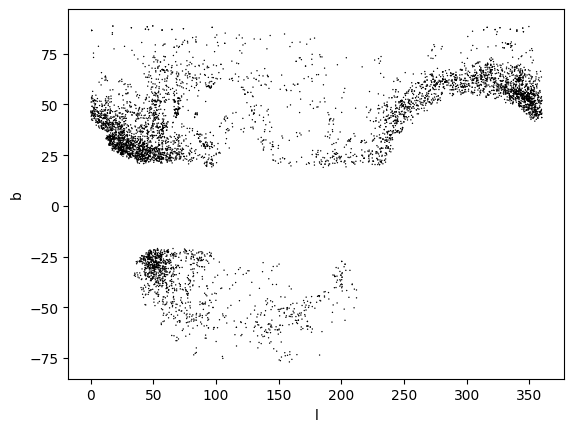

In [9]:
plt.scatter(hdul[3].data['L'], hdul[3].data['B'], edgecolor='none', facecolor='black', s=1)
plt.xlabel('l')
plt.ylabel('b')

In [10]:
#cats = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'l','b','d','vlos','mul','mub','d_err','vlos_err','mul_err','mub_err','pm_corr']


In [11]:
# now let's make a pandas dataframe with all the stuff we want
# and save to a simple csv format

distance_error_rate = 0.1 # assume 10% distance error

DF = pd.DataFrame({'x':np.array(cartesian_coords.x), 'y':np.array(cartesian_coords.y), 'z':np.array(cartesian_coords.z), \
                   'vx':np.array(cartesian_velocity.d_x), 'vy':np.array(cartesian_velocity.d_y), 'vz':np.array(cartesian_velocity.d_z),
                   'l':np.array(hdul[3].data['L']).astype(float),'b':np.array(hdul[3].data['B']).astype(float),'d':np.array(hdul[2].data['DIST']).astype(float),'vlos':np.array(hdul[1].data['VRAD']).astype(float),\
                   'mul':np.array(hdul[3].data['PMRA']).astype(float),'mub':np.array(hdul[3].data['PMDEC']).astype(float),\
                   'd_err':distance_error_rate*np.array(hdul[2].data['DIST']).astype(float),'vlos_err':np.array(hdul[1].data['VRAD_ERR']).astype(float),\
                   'mul_err':np.array(hdul[3].data['PMRA_ERROR']).astype(float),'mub_err':np.array(hdul[3].data['PMDEC_ERROR']).astype(float),\
                   'pm_corr':np.array(hdul[3].data['PMRA_PMDEC_CORR']).astype(float),\
                   'TEFF': np.array(hdul[1].data['TEFF']).astype(float), \
                   'LOGG': np.array(hdul[1].data['LOGG']).astype(float), \
                    'FEH': np.array(hdul[1].data['FEH']).astype(float), \
                    'RA':np.array(hdul[3].data['RA']).astype(float),\
                    'DEC': np.array(hdul[3].data['DEC']).astype(float)})


DF.to_csv('Bystrom_2025_BHB.csv')
